<a href="https://colab.research.google.com/github/Niluferkk/DSML-PROJECT/blob/main/Project_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from  sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.impute import SimpleImputer
import joblib

**Load Dataset**

In [19]:
data=pd.read_csv('online_sales_dataset.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


**Data Exploration**

In [20]:
data.shape

(49782, 17)

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [22]:
data.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
Discount,float64
PaymentMethod,object


In [23]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [24]:
#finding missing values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0


In [25]:
missing_data_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_data_percentage)

InvoiceNo            0.000000
StockCode            0.000000
Description          0.000000
Quantity             0.000000
InvoiceDate          0.000000
UnitPrice            0.000000
CustomerID           9.999598
Country              0.000000
Discount             0.000000
PaymentMethod        0.000000
ShippingCost         4.999799
Category             0.000000
SalesChannel         0.000000
ReturnStatus         0.000000
ShipmentProvider     0.000000
WarehouseLocation    7.000522
OrderPriority        0.000000
dtype: float64


In [28]:
data['CustomerID'] = data['CustomerID'].fillna(data['CustomerID'].median())

In [29]:
data['ShippingCost'] = data['ShippingCost'].fillna(data['ShippingCost'].median())

In [35]:
data['WarehouseLocation'] = data['WarehouseLocation'].fillna('Unknown')


In [36]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Discount,0
PaymentMethod,0


In [39]:
#DROP UNWANTED COLUMNS

data.drop(columns=['StockCode','WarehouseLocation'],axis=1, inplace=True)


In [40]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority
0,221958,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,Medium
1,771155,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Medium
2,231932,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,High
3,465838,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Low
4,359178,USB Cable,-30,2020-01-01 04:00,-68.11,17.5,United Kingdom,1.501433,Bank Transfer,17.50,Electronics,In-store,Not Returned,FedEx,Medium


In [ ]:
data.duplicated().sum()

np.int64(0)

In [37]:
#negetive values
print(data[['Quantity', 'UnitPrice']].min())


Quantity    -50.00
UnitPrice   -99.98
dtype: float64


In [38]:
print((data['UnitPrice'] < 0).sum())


1493


In [37]:
print((data['Quantity'] < 0).sum())

2489


In [42]:
#converting negetive to absolute values
data['Quantity'] = data['Quantity'].apply(lambda x: abs(x))


In [43]:
data['UnitPrice'] = data['UnitPrice'].apply(lambda x: abs(x))

In [46]:
#after converting
print((data['UnitPrice'] < 0).sum())

0


In [45]:
print((data['Quantity'] < 0).sum())

0


In [7]:
# Convert invoicedate to datetime in pandas

date_time=data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(date_time)

0       2020-01-01 00:00:00
1       2020-01-01 01:00:00
2       2020-01-01 02:00:00
3       2020-01-01 03:00:00
4       2020-01-01 04:00:00
                ...        
49777   2025-09-05 01:00:00
49778   2025-09-05 02:00:00
49779   2025-09-05 03:00:00
49780   2025-09-05 04:00:00
49781   2025-09-05 05:00:00
Name: InvoiceDate, Length: 49782, dtype: datetime64[ns]


In [9]:
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
data['InvoiceDay'] = data['InvoiceDate'].dt.day
data['InvoiceWeekday'] = data['InvoiceDate'].dt.day_name()
data['InvoiceHour'] = data['InvoiceDate'].dt.hour
data[[ 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday', 'InvoiceHour']].sample(5)

,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday,InvoiceHour
43939,2025,1,4,Saturday,19
11489,2021,4,23,Friday,17
27032,2023,1,31,Tuesday,8
10159,2021,2,27,Saturday,7
46053,2025,4,2,Wednesday,21


**Encoding**

In [ ]:
data.select_dtypes(include='object').columns

Index(['Description', 'InvoiceDate', 'Country', 'PaymentMethod', 'Category',
       'SalesChannel', 'ReturnStatus', 'ShipmentProvider', 'OrderPriority'],
      dtype='object')

In [ ]:
le=LabelEncoder()
data['Description']=le.fit_transform(data['Description'])
data['InvoiceDate']=le.fit_transform(data['InvoiceDate'])
data['Country']=le.fit_transform(data['Country'])
data['PaymentMethod']=le.fit_transform(data['PaymentMethod'])
data['Category']=le.fit_transform(data['Category'])
data['SalesChannel']=le.fit_transform(data['SalesChannel'])
data['ReturnStatus']=le.fit_transform(data['ReturnStatus'])
data['ShipmentProvider']=le.fit_transform(data['ShipmentProvider'])
data['OrderPriority']=le.fit_transform(data['OrderPriority'])
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority
0,221958,9,38,0,1.71,37039.000000,0,0.470000,0,10.790000,1,0,0,3,2
1,771155,9,18,1,41.25,19144.000000,8,0.190000,2,9.510000,2,1,0,3,2
2,231932,3,49,2,29.11,50472.000000,3,0.350000,0,23.030000,2,1,1,3,0
3,465838,2,14,3,76.68,96586.000000,5,0.140000,2,11.080000,0,1,0,2,1
4,359178,7,-30,4,-68.11,55032.871775,10,1.501433,0,17.494529,2,0,0,1,2


In [ ]:
data.dtypes

,0
InvoiceNo,int64
Description,int64
Quantity,int64
InvoiceDate,int64
UnitPrice,float64
CustomerID,float64
Country,int64
Discount,float64
PaymentMethod,int64
ShippingCost,float64


**Handling** **Outliers**

In [13]:
#detecting outliers in all numerical columns

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\n Column: {col}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of Outliers: {outliers.shape[0]}")



 Column: InvoiceNo
  Lower Bound: -353188.50
  Upper Bound: 1454095.50
  Number of Outliers: 0

 Column: Quantity
  Lower Bound: -28.00
  Upper Bound: 76.00
  Number of Outliers: 1090

 Column: UnitPrice
  Lower Bound: -52.93
  Upper Bound: 151.14
  Number of Outliers: 751

 Column: CustomerID
  Lower Bound: -34082.50
  Upper Bound: 144139.50
  Number of Outliers: 0

 Column: Discount
  Lower Bound: -0.24
  Upper Bound: 0.76
  Number of Outliers: 996

 Column: ShippingCost
  Lower Bound: -7.53
  Upper Bound: 42.47
  Number of Outliers: 0


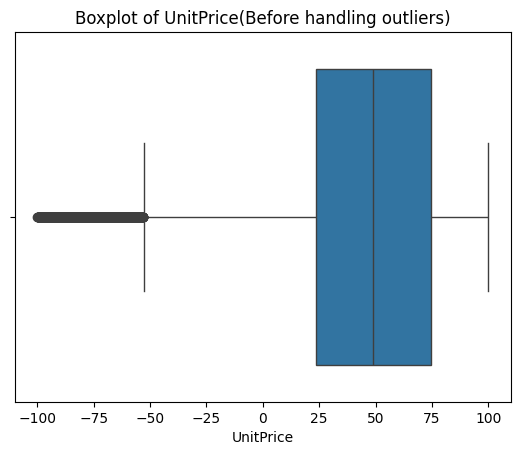

In [17]:
#visualisation using boxpot for unitprice

sns.boxplot(x=data['UnitPrice'])
plt.title("Boxplot of UnitPrice(Before handling outliers)")
plt.show()


In [20]:
#handling outliers
Q1 = data['UnitPrice'].quantile(0.25)
Q3 = data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data['UnitPrice'] = np.where(data['UnitPrice'] < lower_bound, lower_bound,
                          np.where(data['UnitPrice'] > upper_bound, upper_bound, data['UnitPrice']))


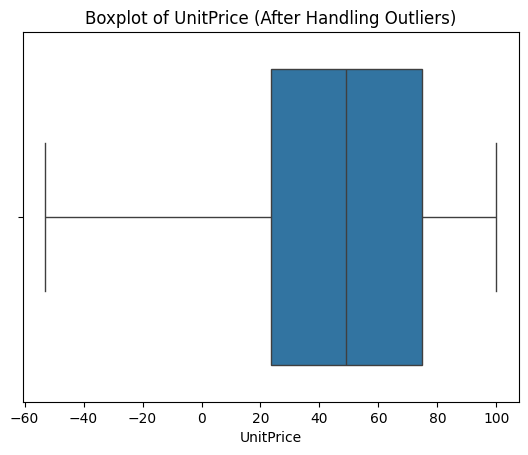

In [23]:
sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot of UnitPrice (After Handling Outliers)')
plt.show()

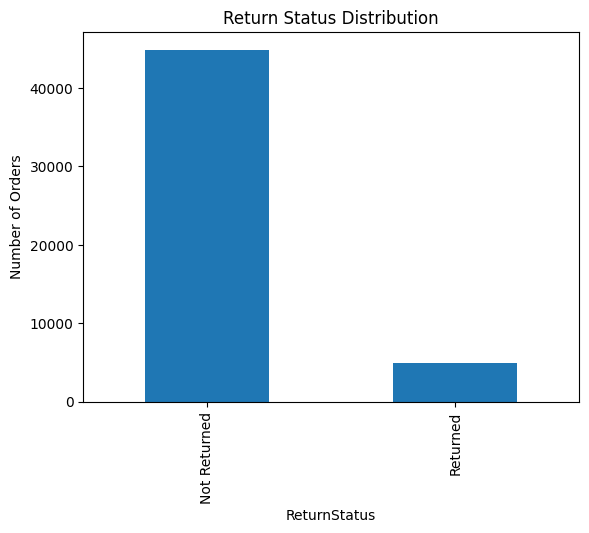

In [24]:
#Visualizations -BAR CHART
data['ReturnStatus'].value_counts().plot(kind='bar', title='Return Status Distribution')
plt.ylabel('Number of Orders')
plt.show()


In [6]:
#Standard Scaler
columns_to_scale = ['UnitPrice', 'ShippingCost']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns_to_scale])

In [31]:
print(data[columns_to_scale].describe())

          UnitPrice  ShippingCost
count  4.978200e+04  4.729300e+04
mean   7.593281e-17 -5.115763e-16
std    1.000010e+00  1.000011e+00
min   -3.126706e+00 -1.730429e+00
25%   -7.534400e-01 -8.689906e-01
50%    3.202755e-02  7.576765e-04
75%    8.287372e-01  8.621962e-01
max    1.616143e+00  1.731944e+00


In [33]:
data.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
Discount,float64
PaymentMethod,object


In [41]:
data.to_csv("preprocessed_sales_data.csv", index=False)

In [42]:

from google.colab import files
files.download("preprocessed_sales_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>